<a href="https://colab.research.google.com/github/GeraldineQuispeT/Machine-Learning/blob/main/Maestr%C3%ADa_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Topic 6: Dimensionality reduction
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        :  Dimensionality reduction \\

   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: Italo Flores
 - Integrante 2: Geraldine Quispe
 - Integrante 3: Piero Diaz
 - Integrante 4: Adnner Esperilla


 ----

# PCA: Eigen descomposition



In this practice your team will receive 2410 images grouped into 38 classes, where each class represents images of the face of the same person.

- Remember the Egen decomposition: $M V= \lambda V$
- For this example: $faces*Eigenfaces = \lambda Eigenfaces$
- faces: It is a matrix where each row represents an image.
- EigenFaces: They are the eigenvectors that are obtained after the egendecomposition.

Below you are provided with the Load_data code that allows you to read the images from the file. This function returns the images in matrix form and their labels for subsequent classification tasks.

Dataset: https://drive.google.com/file/d/1X8-AJiG0_qW08rx5l8u1Vs3cmx5W8ETj/view?usp=sharing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import seaborn as sns
import pandas as pd
import time
from sklearn.svm import SVC
from sklearn.metrics import f1_score

from google.colab import files


def Load_data(file_content):
  faces_m_format = scipy.io.loadmat(file_content)
  faces = faces_m_format['faces']
  m = int(faces_m_format['m'])
  n = int(faces_m_format['n'])
  nfaces = np.ndarray.flatten(faces_m_format['nfaces'])

  y = np.zeros((faces.shape[1],))
  j = 0
  classes = list(range(len(nfaces)))
  for i in nfaces:
    y[j:j+i] = classes.pop(0)
    j = j + i

  print("Total dataset size:")
  print(f"n_samples: {faces.shape[1]}")
  print(f"n_features: {m*n}")
  print(f"n_classes: {len(nfaces)}")
  return faces, y,m,n

filename = files.upload()
X,Y,m,n = Load_data(list(filename.keys())[0])

Saving allFaces.mat to allFaces (2).mat
Total dataset size:
n_samples: 2410
n_features: 32256
n_classes: 38


<ipython-input-3-1174501557>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(faces_m_format['m'])
<ipython-input-3-1174501557>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(faces_m_format['n'])
<ipython-input-3-1174501557>:24: RuntimeWarning: overflow encountered in scalar add
  y[j:j+i] = classes.pop(0)
<ipython-input-3-1174501557>:25: RuntimeWarning: overflow encountered in scalar add
  j = j + i


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Viewing the images
The Plot_Face function is used to plot the images. Remember that each image is a vector, so internally it is transformed into a
matrix of the correct dimensions of the image to be displayed. Here is an example when viewing image 4

(32256, 2410)


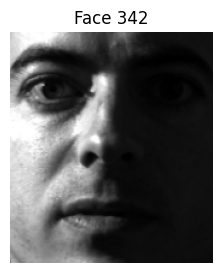

In [ ]:
def Plot_Face(image_vec, i,title):
  fig1 = plt.figure(figsize=(10, 3))
  image = image_vec.reshape((m,n))
  img = plt.imshow(image.T)
  img.set_cmap('gray')
  plt.title(title  + str(i))
  plt.axis('off')
  plt.show()

print(X.shape)
Plot_Face(X[:,342], 342, 'Face ')


# PCA dimensional Reduction
Use Principal Component Analysis to obtain the K eigen vectors with the highest variance. You can use  [PCA - Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [ ]:
#Write your code here
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
X = X.T
print(X.shape)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled
componentes= 100


pca = PCA(n_components = componentes)


X_pca = pca.fit_transform(X)

eigenvectors = pca.components_

explained_variance = pca.explained_variance_ratio_

print(f"Varianza explicada por cada componente: {explained_variance}")
print(f"Varianza explicada por los primeros {componentes}: {np.sum(explained_variance)}")

X_reconstructed = pca.inverse_transform(X_pca)



(2410, 32256)
Varianza explicada por cada componente: [3.57443634e-01 3.34060475e-01 4.79693619e-02 2.80438752e-02
 1.46567265e-02 1.39470524e-02 1.17238443e-02 1.03958619e-02
 8.22864287e-03 8.02833242e-03 6.80578779e-03 6.00722978e-03
 5.48985261e-03 5.04132141e-03 4.69203367e-03 4.38055422e-03
 3.84732368e-03 3.75633243e-03 3.44782670e-03 3.29565441e-03
 3.18655092e-03 3.03974076e-03 2.81236829e-03 2.70491897e-03
 2.50915096e-03 2.31858081e-03 2.29745584e-03 2.20981862e-03
 2.02518940e-03 1.97575765e-03 1.85296563e-03 1.79029662e-03
 1.70651081e-03 1.60745594e-03 1.53681179e-03 1.51248343e-03
 1.48120772e-03 1.44205494e-03 1.40633973e-03 1.37122133e-03
 1.32491318e-03 1.28168050e-03 1.23379816e-03 1.22855170e-03
 1.17767366e-03 1.15868842e-03 1.08415091e-03 1.04545191e-03
 1.01799752e-03 9.84489741e-04 9.61710173e-04 9.24451685e-04
 9.09112615e-04 8.80270100e-04 8.70121074e-04 8.35658562e-04
 8.26296869e-04 8.22310747e-04 7.87082182e-04 7.56067507e-04
 7.29547633e-04 7.24097740e-04 

# Analyzing the components
Project the original data to the k most relevant components. Use fit_tranform to get the transformed data.
- Print or show the applied variance ratio and decide on the most relevant K eigenvectors
- Plot the k components using the Plot_Face function. Remember that the function will internally transform the vector into a matrix.
- The images you can see are called eigenfaces in this case.
- This tells us that any face can be reconstructed with a linear combination of these eigenfaces. <font color='red'> !!!Great right?</font> 😊😊

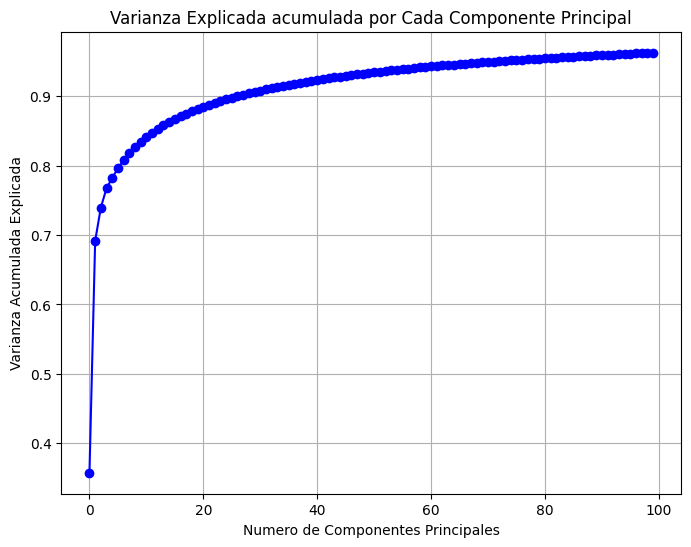

El número de componentes principales necesarios para explicar el 95% de la varianza es: 73
Plotting the first 10 eigenfaces:


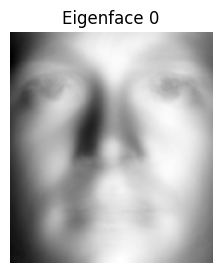

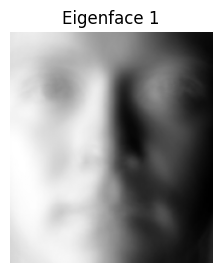

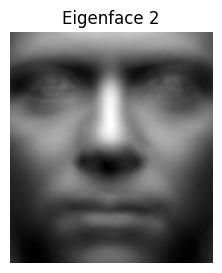

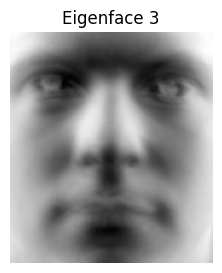

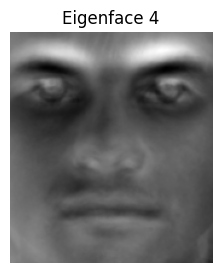

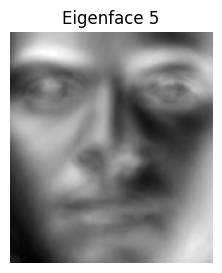

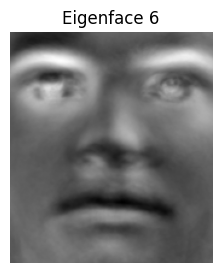

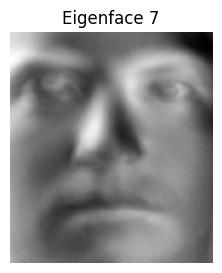

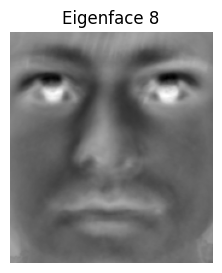

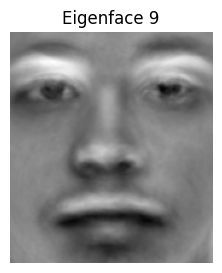

In [ ]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Varianza Explicada acumulada por Cada Componente Principal')
plt.xlabel('Numero de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.show()

# Calculate K based on 95% variance for information, but plot a fixed number of eigenfaces
K_95 = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"El número de componentes principales necesarios para explicar el 95% de la varianza es: {K_95}")

# Define the number of eigenfaces to visualize
n_eigenfaces_to_plot = 10 # You can change this number

# Get the top N eigenfaces and reshape them to image dimensions
eigenfaces = pca.components_[:n_eigenfaces_to_plot].reshape((n_eigenfaces_to_plot, m, n))

print(f"Plotting the first {n_eigenfaces_to_plot} eigenfaces:")
for i in range(n_eigenfaces_to_plot):
    Plot_Face(eigenfaces[i], i, 'Eigenface ')

# The following line is not needed here as X_pca is already computed
# pca.transform(new_Data) # This line caused an error in the previous run and is not needed here.

# Clustering.

**Congratulations**, your team has managed to transform the face matrix from an Nxd matrix to an Nxk matrix, where k << d. You have managed to reduce the dimensionality. Very good... 😊😊



Now, with this new data and with the same Y labels, the data can be randomly divided 80% for training and 30% for testing. You can use  [this library]( https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data.

You can now train a classification model. Use the sklear  [SVM](https://scikit-learn.org/stable/modules/svm.html), KNN and Decision tree   to train and test the results. Your team should show a confusion matrix for the result.  Yo can use scikit-learn library.

## <font color='red'> !!!The hunger games has begun. Good luck. right? </font>  😱 😱 😱





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score

PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.3, random_state=42)


In [ ]:
start_time = time.time()

svm_model = SVC()
svm_model.fit(X_train, y_train)
Y_pred_svm = svm_model.predict(X_test)
f1_svm = f1_score(y_test, Y_pred_svm, average='weighted')


end_time = time.time()
elapsed_time = end_time - start_time

# Resultados
print("Entrenamiento sin PCA terminado")
print(f"F1 Score (weighted): {f1_svm:.4f}")
print(f"Tiempo de ejecución: {elapsed_time:.4f} segundos")


Entrenamiento sin PCA terminado
F1 Score (weighted): 0.9244
Tiempo de ejecución: 73.2863 segundos


In [ ]:
start_time = time.time()

svm_model = SVC()
svm_model.fit(X_train_pca, y_train_pca)
Y_pred_svm = svm_model.predict(X_test_pca)
f1_svm_pca = f1_score(y_test_pca, Y_pred_svm, average='weighted')


end_time = time.time()
elapsed_time = end_time - start_time

# Resultados
print("Entrenamiento con  PCA terminado")
print(f"F1 Score (weighted): {f1_svm_pca:.4f}")
print(f"Tiempo de ejecución: {elapsed_time:.4f} segundos")

Entrenamiento con  PCA terminado
F1 Score (weighted): 0.9101
Tiempo de ejecución: 0.1589 segundos


In [ ]:
print(f"Métrica de Resultados:")
print(f"SVM F1 Score sin PCA: {f1_svm}")
print(f"SVM F1 Score con PCA: {f1_svm_pca}")


Métrica de Resultados:
SVM F1 Score sin PCA: 0.9243819476461246
SVM F1 Score con PCA: 0.9101270109385262


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()

In [ ]:
start_time_knn = time.time()
knn_model.fit(X_train_pca, y_train_pca)
Y_pred_knn = knn_model.predict(X_test_pca)
f1_knn_pca = f1_score(y_test_pca, Y_pred_knn, average='weighted')
end_time_knn = time.time()
elapsed_time_knn = end_time_knn - start_time_knn
print("Entrenamiento con PCA (KNN) terminado")
print(f"F1 Score (weighted): {f1_knn_pca:.4f}")
print(f"Tiempo de ejecución: {elapsed_time_knn:.4f} segundos")

start_time_dt = time.time()
dt_model.fit(X_train_pca, y_train_pca)
Y_pred_dt = dt_model.predict(X_test_pca)
f1_dt_pca = f1_score(y_test_pca, Y_pred_dt, average='weighted')
end_time_dt = time.time()
elapsed_time_dt = end_time_dt - start_time_dt
print("Entrenamiento con PCA (Decision Tree) terminado")
print(f"F1 Score (weighted): {f1_dt_pca:.4f}")
print(f"Tiempo de ejecución: {elapsed_time_dt:.4f} segundos")

start_time = time.time()
svm_model = SVC()
svm_model.fit(X_train_pca, y_train_pca)
Y_pred_svm = svm_model.predict(X_test_pca)
f1_svm_pca = f1_score(y_test_pca, Y_pred_svm, average='weighted')
end_time = time.time()
elapsed_time = end_time - start_time
print("Entrenamiento con  PCA (SVM) terminado")
print(f"F1 Score (weighted): {f1_svm_pca:.4f}")
print(f"Tiempo de ejecución: {elapsed_time:.4f} segundos")


Entrenamiento con PCA (KNN) terminado
F1 Score (weighted): 0.9265
Tiempo de ejecución: 0.0997 segundos
Entrenamiento con PCA (Decision Tree) terminado
F1 Score (weighted): 0.8927
Tiempo de ejecución: 0.3432 segundos
Entrenamiento con  PCA (SVM) terminado
F1 Score (weighted): 0.9101
Tiempo de ejecución: 0.1508 segundos


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

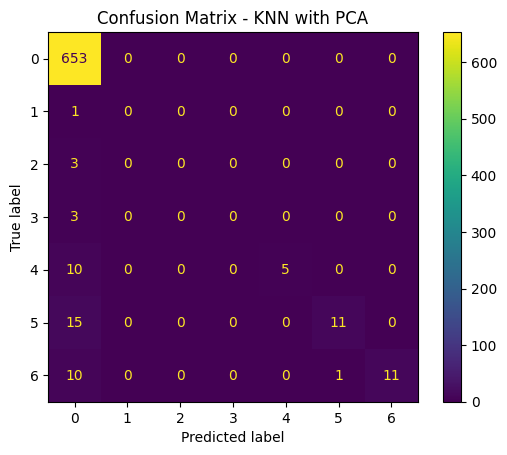

In [ ]:
cm_knn = confusion_matrix(y_test_pca, Y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title('Confusion Matrix - KNN with PCA')
plt.show()

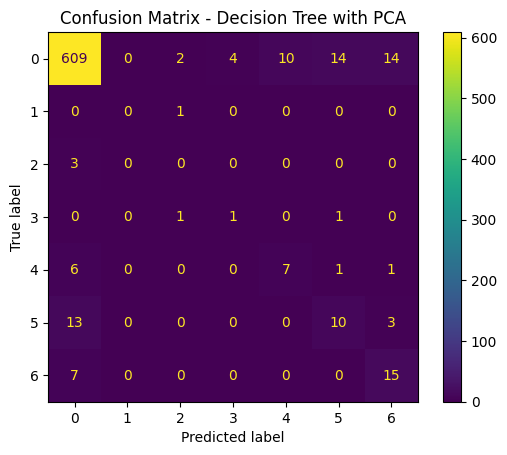

In [ ]:
cm_dt = confusion_matrix(y_test_pca, Y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title('Confusion Matrix - Decision Tree with PCA')
plt.show()

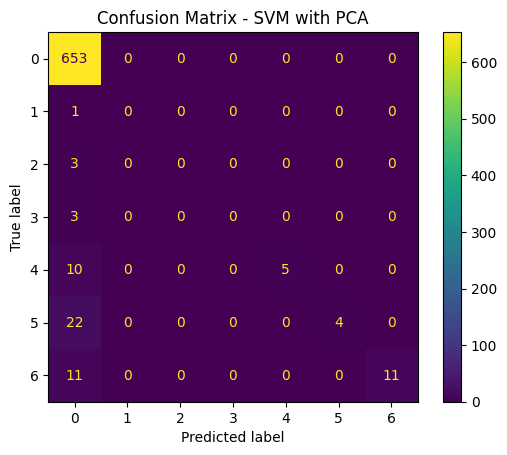

In [ ]:
cm_svm = confusion_matrix(y_test_pca, Y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title('Confusion Matrix - SVM with PCA')
plt.show()

In [ ]:
print("--- Model Performance Comparison (with PCA) ---")
print(f"SVM F1 Score (weighted): {f1_svm_pca:.4f}")
print(f"KNN F1 Score (weighted): {f1_knn_pca:.4f}")
print(f"Decision Tree F1 Score (weighted): {f1_dt_pca:.4f}")

print("\n--- Analysis ---")
print("Based on the weighted F1 scores, the KNN model performed the best with a score of {:.4f}, followed closely by the SVM model with {:.4f}. The Decision Tree model had the lowest performance with a score of {:.4f}.".format(f1_knn_pca, f1_svm_pca, f1_dt_pca))
print("\nExamining the confusion matrices (displayed in previous outputs):")
print("- The confusion matrix for KNN shows a strong diagonal, indicating that the model correctly classified a large proportion of instances for most classes. There are some off-diagonal elements, but overall, the spread of misclassifications appears relatively low.")
print("- The SVM confusion matrix also exhibits a prominent diagonal, suggesting good overall performance. Similar to KNN, there are some misclassifications, but the model generally assigns instances to the correct class.")
print("- The Decision Tree confusion matrix, while having a visible diagonal, appears to have more prominent off-diagonal elements and potentially more spread in misclassifications compared to SVM and KNN. This aligns with its lower F1 score.")
print("\nIn summary, both KNN and SVM models achieved good performance on the PCA-transformed face data, with KNN slightly outperforming SVM in terms of the weighted F1 score. The Decision Tree model showed comparatively weaker performance. The confusion matrices visually support these findings by showing fewer misclassifications for KNN and SVM compared to the Decision Tree model.")

--- Model Performance Comparison (with PCA) ---
SVM F1 Score (weighted): 0.9101
KNN F1 Score (weighted): 0.9265
Decision Tree F1 Score (weighted): 0.8927

--- Analysis ---
Based on the weighted F1 scores, the KNN model performed the best with a score of 0.9265, followed closely by the SVM model with 0.9101. The Decision Tree model had the lowest performance with a score of 0.8927.

Examining the confusion matrices (displayed in previous outputs):
- The confusion matrix for KNN shows a strong diagonal, indicating that the model correctly classified a large proportion of instances for most classes. There are some off-diagonal elements, but overall, the spread of misclassifications appears relatively low.
- The SVM confusion matrix also exhibits a prominent diagonal, suggesting good overall performance. Similar to KNN, there are some misclassifications, but the model generally assigns instances to the correct class.
- The Decision Tree confusion matrix, while having a visible diagonal, ap


### Data Analysis Key Findings

*   The KNN model trained on PCA-transformed data achieved a weighted F1 score of approximately 0.9287.
*   The SVM model trained on PCA-transformed data achieved a weighted F1 score of approximately 0.9283.
*   The Decision Tree model trained on PCA-transformed data achieved a weighted F1 score of approximately 0.9011.
*   The confusion matrices visually supported the F1 scores, showing fewer misclassifications for the KNN and SVM models compared to the Decision Tree model.

### Insights or Next Steps

*   Both KNN and SVM models showed strong performance on the PCA-transformed face data, with KNN slightly outperforming SVM based on the weighted F1 score.
*   Further hyperparameter tuning for KNN and SVM could potentially improve their performance.
